In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import z_score

# Step 1: Load data

In [13]:
df = pd.read_csv('Data/house-data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Step 2: Clean data

From the data, there can be seen an 'id' on each row. This is an arbitrary value for identifying a unique row and is not needed for further data analysis, so it'll be dropped.

In [14]:
df = df.drop(['id'], axis=1)

In [5]:
print("--- Check for missing values ---")
print(df.isnull().sum())

print("--- Check for data types ---")
print(df.info())

--- Check for missing values ---
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64
--- Check for data types ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int6

The check for null values gave no results, but the type check showed that the 'date' field was marked as an object!

In [15]:
df["date"] = pd.to_datetime(df["date"])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21613 non-null  datetime64[ns]
 1   price          21613 non-null  float64       
 2   bedrooms       21613 non-null  int64         
 3   bathrooms      21613 non-null  float64       
 4   sqft_living    21613 non-null  int64         
 5   sqft_lot       21613 non-null  int64         
 6   floors         21613 non-null  float64       
 7   waterfront     21613 non-null  int64         
 8   view           21613 non-null  int64         
 9   condition      21613 non-null  int64         
 10  grade          21613 non-null  int64         
 11  sqft_above     21613 non-null  int64         
 12  sqft_basement  21613 non-null  int64         
 13  yr_built       21613 non-null  int64         
 14  yr_renovated   21613 non-null  int64         
 15  zipcode        2161

The 'date' field is now changed to a datetime instead.

In [22]:
zframe = df.drop(['date'], axis=1)
z_score.calculate(zframe)

outliers = z_score.getOutliers(data=zframe, threshold=3)
print(outliers)
print(len(outliers))
print(len(zframe))
print(len(outliers)/len(zframe) * 100) # This is the percentage of outliers


[2000000.0, 2250000.0, 2400000.0, 2900000.0, 2050000.0, 3075000.0, 2384000.0, 2250000.0, 2125000.0, 1950000.0, 3070000.0, 2250000.0, 2400000.0, 2450000.0, 1955000.0, 1750000.0, 5110800.0, 1875000.0, 2300000.0, 2260000.0, 5300000.0, 2200000.0, 1700000.0, 2537000.0, 5350000.0, 2250000.0, 1679000.0, 1928000.0, 2350000.0, 1715000.0, 2400000.0, 2532000.0, 3850000.0, 1735000.0, 1700000.0, 1650000.0, 1680000.0, 1760000.0, 2750000.0, 1810000.0, 3278000.0, 1700000.0, 1865000.0, 1650000.0, 4500000.0, 1835000.0, 3600000.0, 3000000.0, 2950000.0, 2525000.0, 1799000.0, 2298000.0, 2288000.0, 1899000.0, 1901000.0, 1900000.0, 1965000.0, 1675000.0, 2075000.0, 2544750.0, 2095000.0, 2453500.0, 2450000.0, 1905000.0, 1740000.0, 1650000.0, 2890000.0, 2200000.0, 2950000.0, 7062500.0, 2400000.0, 2500000.0, 2150000.0, 4000000.0, 2880500.0, 1875000.0, 2400000.0, 2125000.0, 2050000.0, 1705000.0, 5570000.0, 1670000.0, 2000000.0, 2485000.0, 1850000.0, 2479000.0, 2048000.0, 1895000.0, 1940000.0, 1740000.0, 2850000.0

# Step 3: Explore data

In [8]:
df.describe()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,2014-10-29 04:38:01.959931648,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
min,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2014-07-22 00:00:00,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000
std,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631


# Step 4: Data preperation

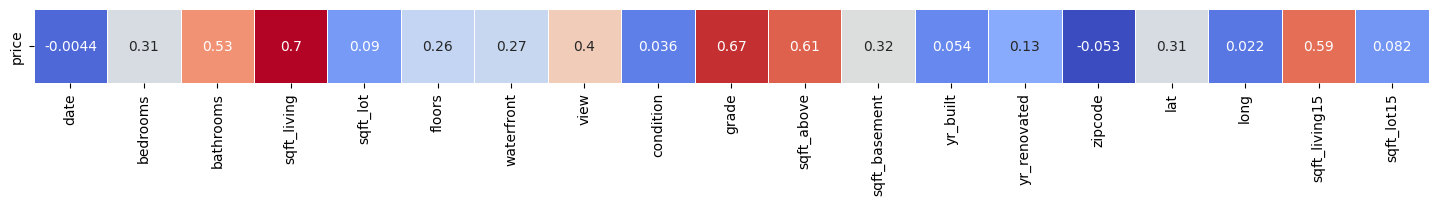

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
date            -0.004357
zipcode         -0.053203
Name: price, dtype: float64

Closest to zero: date


In [9]:
df_corr = df.corr()

plt.figure(figsize=(18, 16))
sns.heatmap(df_corr['price'].drop('price').to_frame().T, annot=True, cmap='coolwarm', linewidths=0.5, cbar=False, square=True)
plt.show()

# Using the absolute value of the correlation, we can find the attribute that is closest to zero
df_price_corr = df_corr['price'].sort_values(ascending=False)
print(df_price_corr)

closest_to_zero = df_price_corr.abs().idxmin()
print(f"\nClosest to zero: {closest_to_zero}")

# From both the correlation data and the heatmap, it can be seen that pH has the lowest correlation with quality.
# wines_without_pH = df.drop(closest_to_zero, axis=1)

Using the above diagram and correlation output, it can be seen a multiple low correlations between price and the rest of the data. Anything below 1% is unlikely to have any effect on the price. From the diagram, it can be seen that 'date' lies below the set threshold and will be dropped.

In [10]:
df = df.drop(['date'], axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
